In [49]:
#Defendencies
import pandas as pd
from pathlib import Path
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [50]:
#Use Panda to read Data
crash_data = pd.read_csv("Resources/Crash_Data.csv")
crash_data.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


---

# Exploratory Data Analysis 

---

In [51]:
crash_data.shape

(48882, 35)

In [52]:
crash_data.isna().sum()

X                       139
Y                       139
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet             304
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 45
Gender_Drv1             885
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          45
AlcoholUse_Drv1          45
DrugUse_Drv1             45
Unittype_Two           3203
Age_Drv2               4507
Gender_Drv2            4604
Traveldirection_Two    3203
Unitaction_Two         3203
Violation1_Drv2        4507
AlcoholUse_Drv2        4507
DrugUse_Drv2           4507
Latitude                139
Longitude               139
dtype: int64

### ----

In [53]:
#filter Data to specific years
specific_year=crash_data.loc[(crash_data["Year"]==2019) | (crash_data["Year"]==2020) |
                             (crash_data["Year"]==2021) | (crash_data["Year"]==2022)]
specific_year

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32271,-111.919900,33.360130,32272,3605175,2019/01/01 07:26:00+00,2019,Lakeshore Dr,Bell De Mar Dr,400.0,Not Junction Related,1.0,0.0,Suspected Serious Injury,Rear End,Dark Lighted,Clear,Dry,Driver,28.0,Male,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driverless,NaN,NaN,North,Properly Parked,NaN,NaN,NaN,33.360130,-111.919900
32272,-111.891090,33.418430,32273,3524937,2019/01/01 08:17:00+00,2019,Victory Dr,Price Rd,-150.0,Not Junction Related,0.0,0.0,No Injury,Head On,Dark Unknown Lighting,Cloudy,Wet,Driver,54.0,Female,East,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,118.0,Unknown,East,Properly Parked,No Improper Action,No Apparent Influence,No Apparent Influence,33.418430,-111.891090
32273,-111.892010,33.407360,32274,3502322,2019/01/01 09:40:00+00,2019,Price Rd,Broadway Rd,-50.0,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Unknown Lighting,Clear,Dry,Driver,118.0,Unknown,South,Unknown,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.407360,-111.892010
32274,-111.940150,33.407390,32275,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,Driver,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407390,-111.940150
32275,-111.967380,33.378300,32276,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,Driver,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,Driver,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.378300,-111.967380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46462,-111.933653,33.421967,46463,4016095,2022/12/31 20:35:00+00,2022,University Dr,College Ave,401.0,Not Junction Related,0.0,0.0,No Injury,Rear End,Daylight,Cloudy,Dry,Driver,58.0,Male,West,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,22.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653
46463,-111.939610,33.393137,46464,4017552,2022/12/31 21:55:00+00,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,0.0,0.0,No Injury,Other,Daylight,Clear,Dry,Driver,23.0,Male,East,Backing,Other,No Apparent Influence,No Apparent Influence,Driver,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610
46464,-111.961130,33.378244,46465,4014475,2023/01/01 01:02:00+00,2022,Baseline Rd,Darrow Dr,0.0,Intersection 4 Way 202,1.0,0.0,Suspected Minor Injury,Left Turn,Dark Lighted,Cloudy,Dry,Driver,50.0,Female,Northeast,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,Driver,19.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130
46465,-111.965455,33.378270,46466,4014901,2023/01/01 01:45:00+00,2022,Arizona Mills S,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Dry,Driver,121.0,Unknown,South,Making Right Turn,Failed

In [54]:
specific_year.isna().sum()

X                         1
Y                         1
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName                0
CrossStreet             165
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 13
Gender_Drv1             277
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          13
AlcoholUse_Drv1          13
DrugUse_Drv1             13
Unittype_Two           1042
Age_Drv2               1508
Gender_Drv2            1534
Traveldirection_Two    1042
Unitaction_Two         1042
Violation1_Drv2        1508
AlcoholUse_Drv2        1508
DrugUse_Drv2           1508
Latitude                  1
Longitude                 1
dtype: int64

In [55]:
# Checking the datatype of all the features.
specific_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14196 entries, 32271 to 46466
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    14195 non-null  float64
 1   Y                    14195 non-null  float64
 2   OBJECTID             14196 non-null  int64  
 3   Incidentid           14196 non-null  int64  
 4   DateTime             14196 non-null  object 
 5   Year                 14196 non-null  int64  
 6   StreetName           14196 non-null  object 
 7   CrossStreet          14031 non-null  object 
 8   Distance             14195 non-null  float64
 9   JunctionRelation     14195 non-null  object 
 10  Totalinjuries        14195 non-null  float64
 11  Totalfatalities      14195 non-null  float64
 12  Injuryseverity       14195 non-null  object 
 13  Collisionmanner      14195 non-null  object 
 14  Lightcondition       14195 non-null  object 
 15  Weather              14195 non-n

In [56]:
# checking the statistics ofint64 and float64 datatypes such as mean, medium.
specific_year.describe()

,X,Y,OBJECTID,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,14195.000000,14195.000000,14196.000000,1.419600e+04,14196.000000,14195.00000,14195.000000,14195.000000,14183.000000,12688.000000,14195.000000,14195.000000
mean,-111.933300,33.398878,39369.500000,3.726891e+06,2020.347210,4.58935,0.520113,0.004086,50.780018,39.675757,33.398878,-111.933300
std,0.024238,0.028813,4098.176546,1.780073e+05,1.228968,244.33336,0.854458,0.065965,44.582193,23.087382,0.028813,0.024238
min,-111.979146,33.319863,32272.000000,3.457062e+06,2019.000000,-1964.00000,0.000000,0.000000,8.000000,11.000000,33.319863,-111.979146
25%,-111.952510,33.378270,35820.750000,3.564758e+06,2019.000000,-55.00000,0.000000,0.000000,23.000000,24.000000,33.378270,-111.952510
50%,-111.928610,33.407410,39369.500000,3.692082e+06,2020.000000,0.00000,0.000000,0.000000,33.000000,34.000000,33.407410,-111.928610
75%,-111.911260,33.421947,42918.250000,3.900176e+06,2022.000000,65.00000,1.000000,0.000000,59.000000,50.000000,33.421947,-111.911260
max,-111.877590,33.458490,46467.000000,4.075527e+06,2022.000000,2618.00000,9.000000,2.000000,255.000000,255.000000,33.458490,-111.877590


In [57]:
# checking for the modes for object datatype
specific_year.describe(include="object")

,DateTime,StreetName,CrossStreet,JunctionRelation,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2
count,14196,14196,14031,14195,14195,14195,14195,14195,14195,14195,13919,14195,14195,14183,14183,14183,13154,12662,13154,13154,12688,12688,12688
unique,14079,365,486,18,5,11,7,7,7,4,3,10,23,18,2,2,4,3,10,22,16,2,2
top,2020/03/19 19:57:00+00,Rural Rd,Rural Rd,Intersection Related 206,No Injury,Rear End,Daylight,Clear,Dry,Driver,Male,East,Going Straight Ahead,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,Driver,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence
freq,3,1308,657,4552,9109,4516,9640,12226,13422,13704,7479,3527,6652,3285,13414,14022,12371,7096,3374,6438,11613,12644,12682


Column:  X


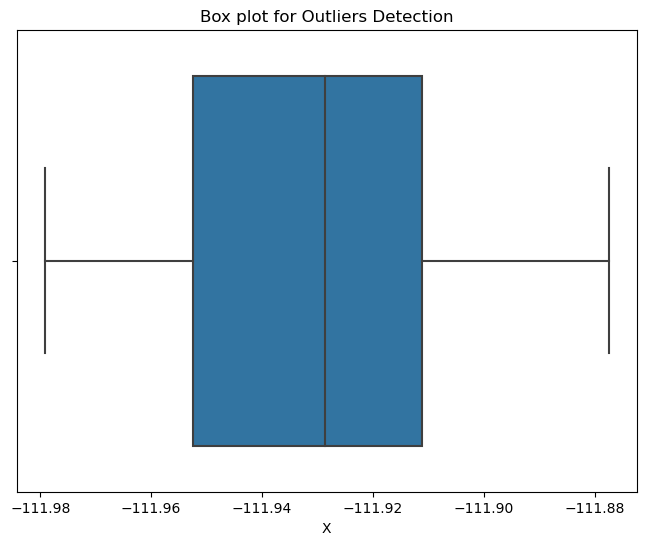

Column:  Y


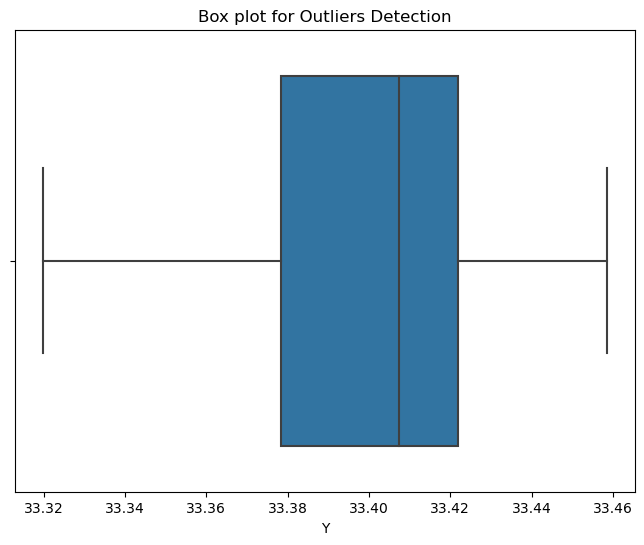

Column:  OBJECTID


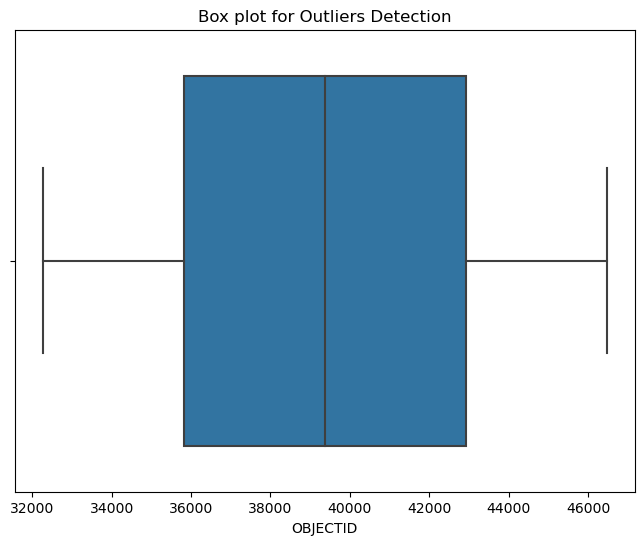

Column:  Incidentid


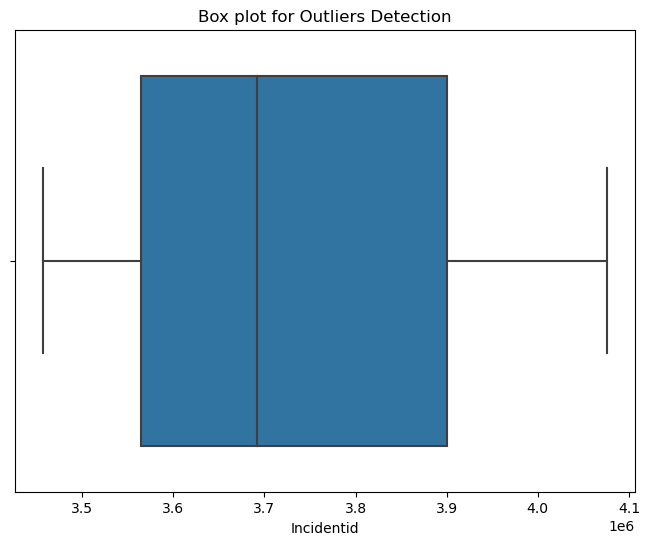

Column:  Year


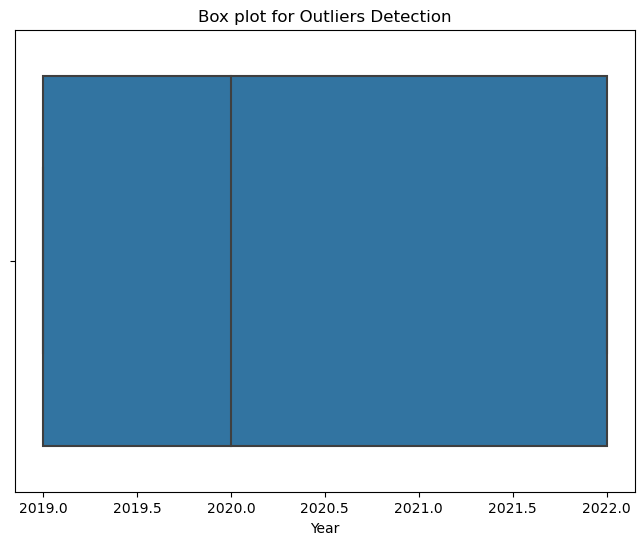

Column:  Distance


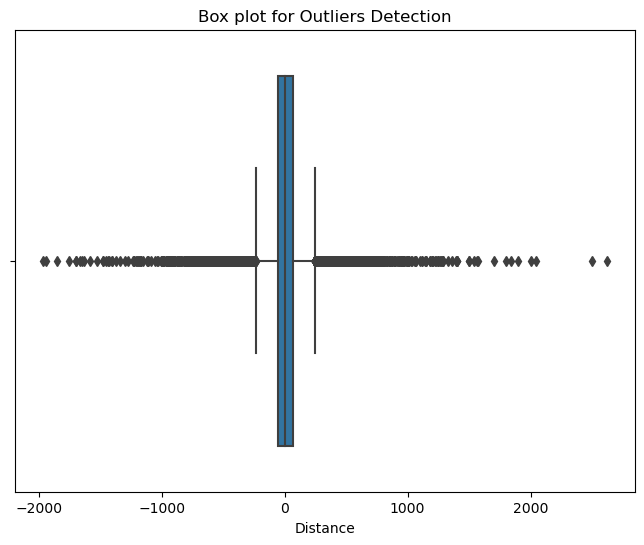

Column:  Totalinjuries


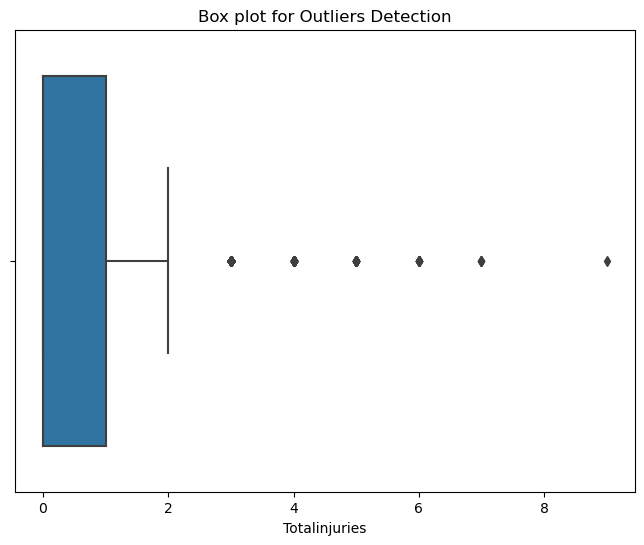

Column:  Totalfatalities


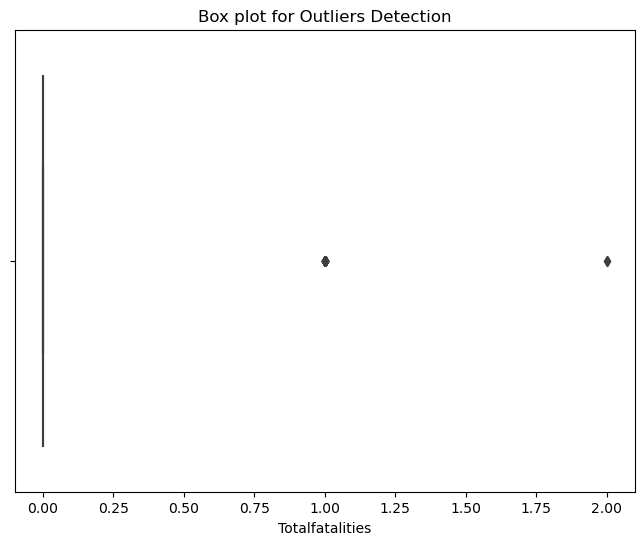

Column:  Age_Drv1


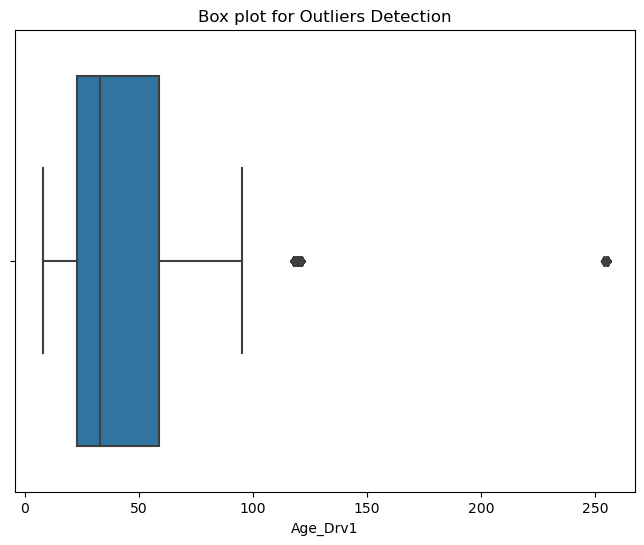

Column:  Age_Drv2


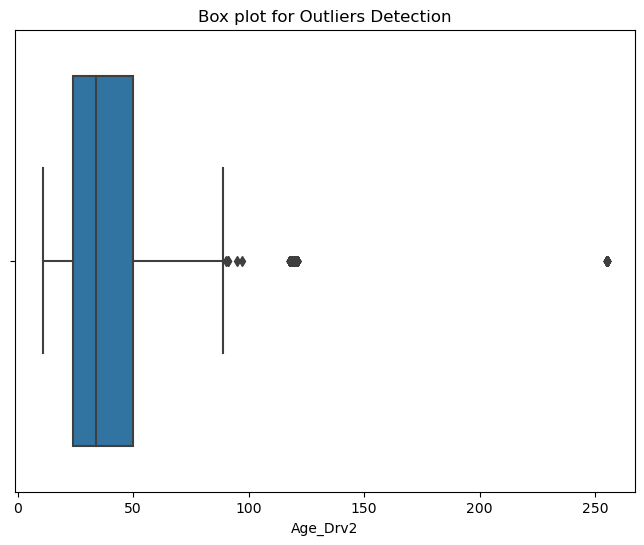

Column:  Latitude


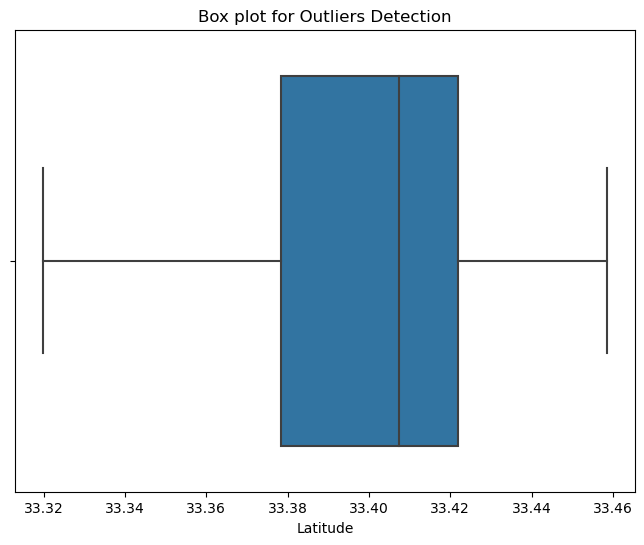

Column:  Longitude


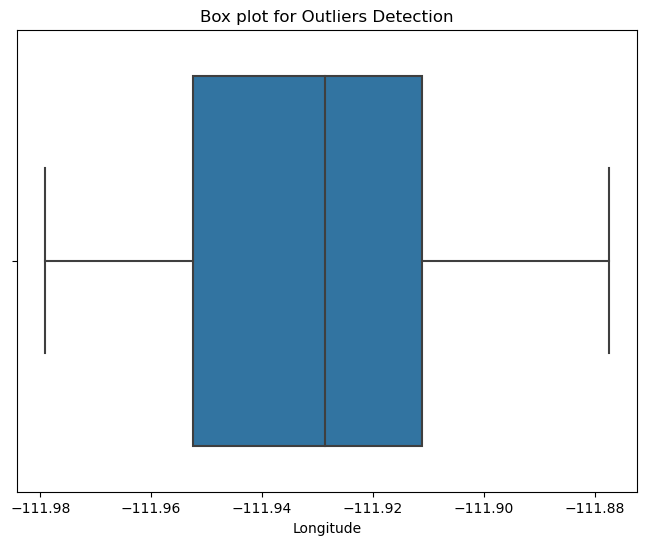

In [58]:
import seaborn as sns

#box plot for outliers
for col in specific_year.columns:
    if specific_year[col].dtypes != 'object':
        print("Column: ", col)
        plt.figure(figsize=(8,6))
        sns.boxplot(x = specific_year[col])
        plt.title('Box plot for Outliers Detection')
        plt.show()

# Data Cleaning:

#### Dropping all the unnecessary columns or duplicate columns like X and Y

In [59]:
specific_year = specific_year.drop(['X', 'Y', 'OBJECTID'], axis = 1)

In [60]:
accidents_df = specific_year[specific_year['Unittype_One'] == 'Driver'][specific_year['Unittype_Two'] == 'Driver']

In [61]:
accidents_df = accidents_df.drop(['Unittype_One', 'Unittype_Two'], axis = 1)

In [62]:
accidents_df.isna().sum()

Incidentid               0
DateTime                 0
Year                     0
StreetName               0
CrossStreet            148
Distance                 0
JunctionRelation         0
Totalinjuries            0
Totalfatalities          0
Injuryseverity           0
Collisionmanner          0
Lightcondition           0
Weather                  0
SurfaceCondition         0
Age_Drv1                 0
Gender_Drv1            213
Traveldirection_One      0
Unitaction_One           0
Violation1_Drv1          0
AlcoholUse_Drv1          0
DrugUse_Drv1             0
Age_Drv2                 0
Gender_Drv2             22
Traveldirection_Two      0
Unitaction_Two           0
Violation1_Drv2          0
AlcoholUse_Drv2          0
DrugUse_Drv2             0
Latitude                 0
Longitude                0
dtype: int64

In [63]:
from scipy import stats

# Select only numeric columns
numeric_columns = accidents_df.select_dtypes(include=['int64', 'float64']).columns

# Function to detect and treat outliers
def detect_and_treat_outliers(data, column):
    # Calculate z-scores
    z_scores = stats.zscore(data[column])
    
    # Set a threshold for z-scores (e.g., 3)
    threshold = 3
    outliers = (abs(z_scores) > threshold)
    
    # Calculate IQR for the column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers based on IQR
    outliers |= (data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)

    # Drop rows with outliers
    data.drop(data[outliers].index, inplace=True)
    
    
# Iterate through numeric columns and detect/treat outliers
for column in numeric_columns:
    detect_and_treat_outliers(accidents_df, column)

# Now, df contains the DataFrame with outliers treated

In [64]:
accidents_df.describe()

,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,7.590000e+03,7590.000000,7590.000000,7590.000000,7590.0,7590.000000,7590.000000,7590.000000,7590.000000
mean,3.716196e+06,2020.270883,2.214055,0.440843,0.0,35.649144,37.490250,33.398268,-111.933445
std,1.791775e+05,1.235860,84.836270,0.684999,0.0,16.587302,15.580009,0.029298,0.024983
min,3.457062e+06,2019.000000,-218.000000,0.000000,0.0,15.000000,16.000000,33.319863,-111.978419
25%,3.556764e+06,2019.000000,-25.000000,0.000000,0.0,22.000000,24.000000,33.378258,-111.955400
50%,3.667243e+06,2020.000000,0.000000,0.000000,0.0,30.000000,33.000000,33.407400,-111.928600
75%,3.892076e+06,2022.000000,30.000000,1.000000,0.0,47.000000,49.000000,33.421942,-111.911187
max,4.065538e+06,2022.000000,230.000000,2.000000,0.0,95.000000,89.000000,33.458490,-111.878282


In [65]:
accidents_df.isna().sum()

Incidentid               0
DateTime                 0
Year                     0
StreetName               0
CrossStreet            117
Distance                 0
JunctionRelation         0
Totalinjuries            0
Totalfatalities          0
Injuryseverity           0
Collisionmanner          0
Lightcondition           0
Weather                  0
SurfaceCondition         0
Age_Drv1                 0
Gender_Drv1              0
Traveldirection_One      0
Unitaction_One           0
Violation1_Drv1          0
AlcoholUse_Drv1          0
DrugUse_Drv1             0
Age_Drv2                 0
Gender_Drv2              0
Traveldirection_Two      0
Unitaction_Two           0
Violation1_Drv2          0
AlcoholUse_Drv2          0
DrugUse_Drv2             0
Latitude                 0
Longitude                0
dtype: int64

In [66]:
accidents_df.shape

(7590, 30)

In [67]:
accidents_df['CrossStreet'].value_counts()


McClintock Dr            292
Rural Rd                 289
Price Rd                 283
Broadway Rd              269
University Dr            264
                        ... 
I-10 Exit 153 C1-Ramp      1
Price Rd Non-Cardinal      1
Stadem Dr                  1
W Cottage Ln               1
SR-202 Exit 7 J-Ramp       1
Name: CrossStreet, Length: 396, dtype: int64

In [68]:
#Imputing Unknown value for Crossstreet:
accidents_df['CrossStreet'].fillna('Unknown', inplace=True)

In [69]:
# Dropping the data of 
accidents_df.isna().sum()

Incidentid             0
DateTime               0
Year                   0
StreetName             0
CrossStreet            0
Distance               0
JunctionRelation       0
Totalinjuries          0
Totalfatalities        0
Injuryseverity         0
Collisionmanner        0
Lightcondition         0
Weather                0
SurfaceCondition       0
Age_Drv1               0
Gender_Drv1            0
Traveldirection_One    0
Unitaction_One         0
Violation1_Drv1        0
AlcoholUse_Drv1        0
DrugUse_Drv1           0
Age_Drv2               0
Gender_Drv2            0
Traveldirection_Two    0
Unitaction_Two         0
Violation1_Drv2        0
AlcoholUse_Drv2        0
DrugUse_Drv2           0
Latitude               0
Longitude              0
dtype: int64

# Data Preparation:

In [70]:
accidents_df.head()

,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32274,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015
32275,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738
32276,3478968,2019/01/02 01:14:00+00,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42203,-111.92566
32277,3470739,2019/01/02 02:22:00+00,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.37842,-111.90926
32282,3470724,2019/01/02 18:54:00+00,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.37846,-111.89371


In [71]:
# Separating Data & Time columns 
accidents_df['DateTime'] = pd.to_datetime(accidents_df['DateTime'])

# Create a new columns for data and time
accidents_df['Date'] = accidents_df['DateTime'].dt.date
accidents_df['Time'] = accidents_df['DateTime'].dt.time

In [72]:
accidents_df = accidents_df.drop(['DateTime'], axis = 1)

In [73]:
accidents_df.head()

,Incidentid,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude,Date,Time
32274,3462432,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015,2019-01-01,12:24:00
32275,3470825,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738,2019-01-01,18:39:00
32276,3478968,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42203,-111.92566,2019-01-02,01:14:00
32277,3470739,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.37842,-111.90926,2019-01-02,02:22:00
32282,3470724,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.37846,-111.89371,2019-01-02,18:54:00


In [74]:
new_column_names= {
                    "Incidentid":"Incident ID", 
                    "StreetName": "Street Name", 
                    "CrossStreet": "Cross Street", 
                    "JunctionRelation": "Junction Relation", 
                    "Totalinjuries": "Total Injuries", 
                    "Totalfatalities": "Total Fatalities", 
                    "Injuryseverity": "Injury Severity", 
                    "Collisionmanner": "Collision Manner", 
                    "Lightcondition": "Light Condition", 
                    "SurfaceCondition": "Surface Condition", 
                    "Age_Drv1": "Age Driver 1",
                    "Gender_Drv1": "Gender Driver 1", 
                    "Traveldirection_One": "Travel Direction One", 
                    "Unitaction_One": "Unit Action One", 
                    "Violation_Drv1": "Violation Driver 1", 
                    "AlcoholUse_Drv1": "Alcohol Use Driver 1", 
                    "DrugUse_Drv1": "Drug Use Driver 1", 
                    "Age_Drv2": "Age Driver 2", 
                    "Gender_Drv2": "Gender Driver 2",
                    "Traveldirection_Two": "Travel Direction Two", 
                    "Unitaction_Two": "Unit Action Two", 
                    "Violation1_Drv2": "Violation 1 Driver 2", 
                    "AlcoholUse_Drv2": "Alcohol Use Driver 2", 
                    "DrugUse_Drv2": "Drug Use Driver 2"}

accidents_df.rename(columns=new_column_names, inplace=True)

accidents_df.head()

,Incident ID,Year,Street Name,Cross Street,Distance,Junction Relation,Total Injuries,Total Fatalities,Injury Severity,Collision Manner,Light Condition,Weather,Surface Condition,Age Driver 1,Gender Driver 1,Travel Direction One,Unit Action One,Violation1_Drv1,Alcohol Use Driver 1,Drug Use Driver 1,Age Driver 2,Gender Driver 2,Travel Direction Two,Unit Action Two,Violation 1 Driver 2,Alcohol Use Driver 2,Drug Use Driver 2,Latitude,Longitude,Date,Time
32274,3462432,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015,2019-01-01,12:24:00
32275,3470825,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738,2019-01-01,18:39:00
32276,3478968,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42203,-111.92566,2019-01-02,01:14:00
32277,3470739,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.37842,-111.90926,2019-01-02,02:22:00
32282,3470724,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.37846,-111.89371,2019-01-02,18:54:00


In [75]:
accidents_df.to_csv('Cleaned_accidents_dataset.csv', index = True)

In [76]:
accidents_df

,Incident ID,Year,Street Name,Cross Street,Distance,Junction Relation,Total Injuries,Total Fatalities,Injury Severity,Collision Manner,Light Condition,Weather,Surface Condition,Age Driver 1,Gender Driver 1,Travel Direction One,Unit Action One,Violation1_Drv1,Alcohol Use Driver 1,Drug Use Driver 1,Age Driver 2,Gender Driver 2,Travel Direction Two,Unit Action Two,Violation 1 Driver 2,Alcohol Use Driver 2,Drug Use Driver 2,Latitude,Longitude,Date,Time
32274,3462432,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407390,-111.940150,2019-01-01,12:24:00
32275,3470825,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.378300,-111.967380,2019-01-01,18:39:00
32276,3478968,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.422030,-111.925660,2019-01-02,01:14:00
32277,3470739,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.378420,-111.909260,2019-01-02,02:22:00
32282,3470724,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.378460,-111.893710,2019-01-02,18:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46458,4017365,2022,Broadway Rd,Hardy Dr,-74.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Dusk,Cloudy,Dry,19.0,Male,East,Going Straight Ahead,Followed Too Closely,No Apparent Influence,No Apparent Influence,28.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.407394,-111.952407,2022-12-31,01:48:00
46460,4047744,2022,Ash Ave,Rio Salado Pkwy,-15.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Dark Lighted,Clear,Dry,17.0,Female,South,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,47.0,Male,North,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.431508,-111.943378,2022-12-31,05:08:00
46461,4017542,2022,Elliot Rd,Harl Ave,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Unknown 51,Unknown,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,50.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349081,-111.965928,2022-12-31,15:47:00
46463,4017552,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,0.0,0.0,No Injury,Other,Daylight,Clear,Dry,23.0,Male,East,Backing,Other,No Apparent Influence,No Apparent Influence,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610,2022-12-31,21:55:00


In [77]:
accidents_df.shape

(7590, 31)

In [78]:
accident_counts = accidents_df.groupby('Year').size().reset_index(name='AccidentCount')

# To view the result
accident_counts.head()

,Year,AccidentCount
0,2019,3120
1,2020,1220
2,2021,1324
3,2022,1926


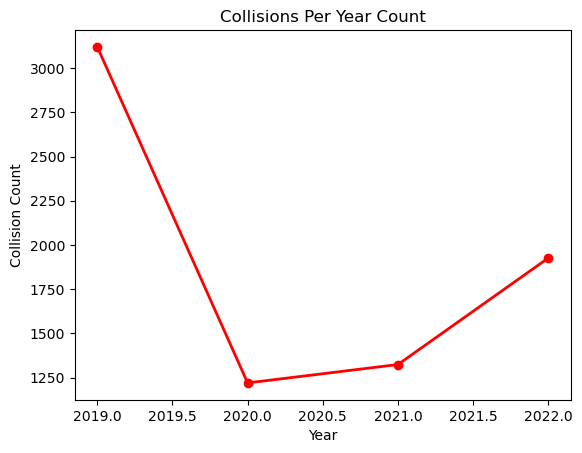

In [79]:
plt.plot(accident_counts["Year"], accident_counts["AccidentCount"], marker='o', color='red', linestyle='-', linewidth=2)

plt.xlabel("Year")
plt.ylabel("Collision Count")
plt.title("Collisions Per Year Count")

plt.savefig('collisions_per_year_line.png')

plt.show()


In [80]:
top_20_cross_streets_df = accidents_df['Cross Street'].value_counts().head(20).reset_index()
top_20_cross_streets_df.columns = ['Cross Street', 'Count', ]
top_20_cross_streets_df.head(20)

,Cross Street,Count
0,McClintock Dr,292
1,Rural Rd,289
2,Price Rd,283
3,Broadway Rd,269
4,University Dr,264
5,Priest Dr,263
6,Southern Ave,221
7,Mill Ave,199
8,Rio Salado Pkwy,180
9,Hardy Dr,176


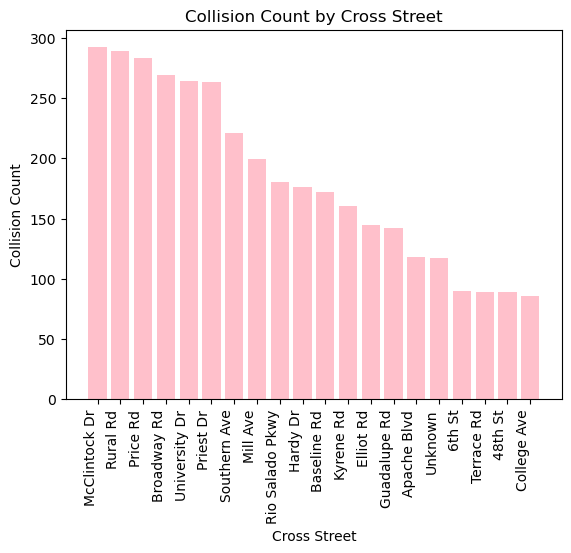

In [81]:
plt.bar(top_20_cross_streets_df["Cross Street"], top_20_cross_streets_df["Count"], color='pink')

plt.xlabel("Cross Street")
plt.ylabel("Collision Count")
plt.title("Collision Count by Cross Street")
plt.xticks(rotation=90, ha='right')

plt.savefig('collision_count_by_cross_street_bar.png')

plt.show()

In [82]:
# Group by "CrossStreet" and count the number of occurrences
coordinates = accidents_df.groupby(["Latitude", "Longitude", "Cross Street"]).size().reset_index(name="Count")

# Sort by count in descending order and take the top 20
coordinates = coordinates.sort_values(by="Count", ascending=False).head(20)

# Display the result
coordinates.head(20)

,Latitude,Longitude,Cross Street,Count
3601,33.417480,-111.909110,Don Carlos Ave,25
5017,33.436620,-111.909620,SR-202 Exit 8 J-Ramp,20
1564,33.379890,-111.928420,Minton Dr,18
1421,33.378300,-111.967380,I-10 Exit 155 J1-Ramp,18
5018,33.436621,-111.909622,SR-202 Exit 8 J-Ramp,16
4771,33.429380,-111.891830,Price Rd,15
2893,33.407500,-111.926280,Rural Rd,15
2819,33.407480,-111.890330,Broadway Rd,15
4197,33.422030,-111.926310,Rural Rd,15
319,33.349070,-111.972830,I-10 Exit 157 A-Ramp,15


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
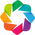

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Count)

In [83]:
import pandas as pd
import hvpp
import holoviews as hv
from holoviews import opts
from bokeh.plotting import save
hv.extension('bokeh')

# Configure the map plot_4
map3 = coordinates.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    #frame_width = 900,
    #frame_height = 700,
    size = "Count",
    scale = 4,
    color = "Count",
    cmap="magma_r" ,
    line_color="blue",
).opts(opts.Points(
        width=900, 
        height=700,  
        title="Collision Occurrence by Coordinates"
    )
      )


hv.save(map3, 'collision_occurence_by_coordinates.html')
map3

In [84]:
top_intersections = accidents_df.groupby(['Street Name', 'Cross Street', 'Latitude', 'Longitude']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(20)
top_intersections

,Street Name,Cross Street,Latitude,Longitude,Count
2251,McClintock Dr,Don Carlos Ave,33.417480,-111.909110,25
2439,McClintock Dr,SR-202 Exit 8 J-Ramp,33.436620,-111.909620,20
570,Baseline Rd,I-10 Exit 155 J1-Ramp,33.378300,-111.967380,18
3861,Rural Rd,Minton Dr,33.379890,-111.928420,18
2440,McClintock Dr,SR-202 Exit 8 J-Ramp,33.436621,-111.909622,16
1215,Broadway Rd,Rural Rd,33.407500,-111.926280,15
3427,Rio Salado Pkwy,Price Rd,33.429380,-111.891830,15
2927,Price Rd,Broadway Rd,33.407480,-111.890330,15
5060,University Dr,Rural Rd,33.422030,-111.926310,15
1432,Elliot Rd,I-10 Exit 157 A-Ramp,33.349070,-111.972830,15


In [97]:
import folium

# Create a Folium map centered around the average latitude and longitude
map_center = [top_intersections['Latitude'].mean(), top_intersections['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each intersection
for index, row in top_intersections.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Street Name']} / {row['Cross Street']} - {row['Count']} accidents",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(accident_map)
    
title_html = '<h3 align="center" style="font-size:16px"><b>Top 20 Intersections for Collisions</b></h3>'
accident_map.get_root().html.add_child(folium.Element(title_html))
    
accident_map.save('top_20_intersection_collision_map.html')

# Display the map
accident_map

In [86]:
top_intersections_2 = accidents_df.groupby(['Street Name', 'Cross Street', 'Violation1_Drv1', 'Latitude', 'Longitude']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(50)
top_intersections_2.head()

,Street Name,Cross Street,Violation1_Drv1,Latitude,Longitude,Count
2685,McClintock Dr,Don Carlos Ave,Failed To Yield Right Of Way,33.417480,-111.909110,22
2909,McClintock Dr,SR-202 Exit 8 J-Ramp,Failed To Yield Right Of Way,33.436620,-111.909620,15
1481,Broadway Rd,Rural Rd,Failed To Yield Right Of Way,33.407500,-111.926280,14
2910,McClintock Dr,SR-202 Exit 8 J-Ramp,Failed To Yield Right Of Way,33.436621,-111.909622,14
4649,Rural Rd,Minton Dr,Failed To Yield Right Of Way,33.379890,-111.928420,13


In [87]:
import folium

# Create a Folium map centered around the average latitude and longitude
map_center = [top_intersections_2['Latitude'].mean(), top_intersections_2['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each intersection
for index, row in top_intersections_2.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Street Name']} / {row['Cross Street']} - Violation: {row['Violation1_Drv1']} - {row['Count']} accidents",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(accident_map)
    
title_html = '<h3 align="center" style="font-size:16px"><b>Top 50 Intersections for Collisions (with Traffic Violation)</b></h3>'
accident_map.get_root().html.add_child(folium.Element(title_html))

accident_map.save('top_50_intersection_collision_violation_map.html')

# Display the map
accident_map


In [98]:
top_intersections_3 = accidents_df.groupby(['Street Name', 'Cross Street', 'Violation1_Drv1', 'Latitude', 'Longitude']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(150)
top_intersections_3.head(20)

,Street Name,Cross Street,Violation1_Drv1,Latitude,Longitude,Count
2685,McClintock Dr,Don Carlos Ave,Failed To Yield Right Of Way,33.417480,-111.909110,22
2909,McClintock Dr,SR-202 Exit 8 J-Ramp,Failed To Yield Right Of Way,33.436620,-111.909620,15
1481,Broadway Rd,Rural Rd,Failed To Yield Right Of Way,33.407500,-111.926280,14
2910,McClintock Dr,SR-202 Exit 8 J-Ramp,Failed To Yield Right Of Way,33.436621,-111.909622,14
4649,Rural Rd,Minton Dr,Failed To Yield Right Of Way,33.379890,-111.928420,13
2342,Kyrene Rd,Elliot Rd,Failed To Yield Right Of Way,33.349200,-111.945730,11
4112,Rio Salado Pkwy,Price Rd,Failed To Yield Right Of Way,33.429380,-111.891830,10
6088,University Dr,Rural Rd,Failed To Yield Right Of Way,33.422030,-111.926310,10
3897,Priest Dr,SR-202 Exit 5 J-Ramp,Disregarded Traffic Signal,33.438500,-111.960840,10
3480,Price Rd,Broadway Rd,Failed To Keep In Proper Lane,33.407480,-111.890330,9


In [89]:
 import folium
from folium.plugins import HeatMap

# Create a Folium map
map_center = [top_intersections_3['Latitude'].mean(), top_intersections_3['Longitude'].mean()]
accident_heat_map = folium.Map(location=map_center, zoom_start=12)

# Convert the DataFrame to a list of lists
heat_data = top_intersections_3[['Latitude', 'Longitude', 'Count']].values.tolist()

# Add Heat Map layer
HeatMap(heat_data).add_to(accident_heat_map)

#Add title to map
title_html = '<h3 align="center" style="font-size:16px"><b>Collisions Heat Map of Tempe, AZ</b></h3>'
accident_heat_map.get_root().html.add_child(folium.Element(title_html))

#Save map as HTML file
accident_heat_map.save('collisions_heat_map.html')

# Display the map
accident_heat_map
